In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [5]:
End = '2015-10-25'

In [6]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [7]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [8]:
if Min_pozycja > Max_pozycja and Max_pozycja < len(df1)-10:
    
    # Trend spadkowy L1
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a1 = (Ay-By)/(Ax-Bx)
        b1 = By - a1*Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy')
            print(f'Punkt A:{A}, Punkt C: {C}, a:{a1}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1*Bx
                
        Cx = df11.index.max() +10
        Cy = a1*Cx +b1
        C = [Cx, Cy]

        X_long = [Ax, Cx]
        Y_long = [Ay, Cy]
        
        
# Trend wzrostowy M1
    
    df2 = df1.iloc[Min_pozycja:]
    Max_pozycja2 = df2['High'].argmax()
    Max_idx2 = df2.iloc[Max_pozycja2].name
    
    Ax = df2.iloc[0].name
    Ay = df2['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['Low'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2*Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2*Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C} a:{a2}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2*Bx
                
            Cx = df2.index.max() +10
            Cy = a2*Cx +b2
            C = [Cx, Cy]

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]

Pierwszy trend:  Malejący
Max/Min:  Wcześniej niż 10 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy
Punkt A:[16387.0, 457.092987], Punkt C: [16459.0, 256.28941132652835], a:-2.788938551020408
------------------------------------------------------------------------------
TREND M1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy
Punkt A:[16449.0, 171.509995], Punkt C: [16743.0, 275.92490758333406] a:0.3551527638888889


# Przerwanie trendu L1

# Pierwsze przerwanie trendu M1

In [9]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2015-10-25'

In [10]:
End = pd.to_datetime(End)
dfxx = df.loc[Start:End]
dfxx.index = dfxx.index.map(mdates.date2num)

In [11]:
dfM1 = dfxx[Max_idx2:]
dfM1['TrendLine'] = dfM1.index * a2 + b2
dfM1['Distance(Low-TL)'] = dfM1['Close'] - dfM1['TrendLine']
QPointsAfterBrake = dfM1['Distance(Low-TL)'][dfM1['Distance(Low-TL)']<0].count()


if QPointsAfterBrake > 0:
    
    ClosingPrice_BP =  dfM1['Close'][dfM1['Distance(Low-TL)']<0].iloc[0]
    ClosingPrice_BPPosition = dfM1.index[dfM1['Distance(Low-TL)']<0][0]
    PointBeforeBPPosition = ClosingPrice_BPPosition - 1
    PointBeforeBPPrice = dfM1['Close'].loc[PointBeforeBPPosition]
    TrendPriceBeforeBP  =  PointBeforeBPPosition * a2 + b2
    
    #Sprawdzamy, czy przełamanie trendu znajduje się w ostatnich 80 dniach od końcowej daty analizowaneog okresu
    
    EndingPoint = dfM1.index[-1]
    
    if EndingPoint - 80 > ClosingPrice_BPPosition:
        print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
        print('-----------------------------------------------------------------------------------------')
        print('Nie rysujemy tuneli')
    
    else:
        print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
        print('---------------------------------------------------------------------------------')
    
        #Sprawdzamy, czy wielkość tunelu jest większa niż 25% wielkości świeczki
        #Jeśli tunel jest mniejszy: cena otwarcia staje się górną granicą tunelu

        BPPrice = ClosingPrice_BPPosition *a2 + b2
        OpenPrice_BP = dfM1.loc[ClosingPrice_BPPosition]['Open']
        BPCandleHeight = OpenPrice_BP - ClosingPrice_BP
        TunelHeight = BPPrice - ClosingPrice_BP


        if TunelHeight/BPCandleHeight < 1/4:

            print('Draw a tunel starting from Open to Close')

            if TrendPriceBeforeBP < PointBeforeBPPrice:

                ClosingPrice_BPPositionEnd = dfM1.index[-1]+5
                BPPrice = OpenPrice_BP


                XBP = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YBP = [BPPrice, BPPrice]
                XClosingPrice = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YClosingPrice = [ClosingPrice_BP, ClosingPrice_BP]


                print('Przebicie trendu wzrostowego L1 w dół')
                print(f'Punkt przecięcia: {YBP[0]}')
                print(f'Punkt wsparcia: {YClosingPrice[0]}')
                print('---------------------------------------')

                # liczymy przełamania cen w korytarzu

                dfM1a = dfxx[ClosingPrice_BPPosition:]
                dfM1a['DownLine'] = ClosingPrice_BP
                dfM1a['UpLine'] = BPPrice
                dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
                dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']

                DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
                UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])

        #-----------------------------------------------------------------------------------------------------------------

                if DownBreaks > 0 and UpBreaks == 0:


                    BPPrice = OpenPrice_BP
                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfM1a.index[dfM1a['Down-Close']<0][0]
                    BP2 = [BP2Possition, BP2Price]
                    BP3 = BP2
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Possition}')

                    # przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = ClosingPrice_BP - BP2Price

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Short position recomended')

                        

                    else:
                        print('')

        #-----------------------------------------------------------------------------------------------------------------               

                elif UpBreaks >0 and DownBreaks ==0:

                    BPPrice = OpenPrice_BP
                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]

                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    print('Third BP founded')

                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')

                    # if  przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = BP3Price - BPPrice

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Long position recomended')

                    else:
                        print('')

        #----------------------------------------------------------------------------------------------------------                

                elif DownBreaks > 0 and UpBreaks > 0:

                    BPPrice = OpenPrice_BP
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfM1a.index[dfM1a['Down-Close']<0][0]

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]

                    if BP2Possition < BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')

                    #----------------------------------------------------------------------------------------------------        

                    elif BP2Possition > BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
            #------------------------------------------------------------------------------------------
                else:
                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    print('There is no decisive BP yet')

    #-----------------------------------------------------------------------------------------------------------------

        else:
            print('Draw a tunel starting from BP to Close')
            print('-----------------------------------------------------------------------------')

            if TrendPriceBeforeBP < PointBeforeBPPrice:

                ClosingPrice_BPPositionEnd = dfM1.index[-1]+5
                BPPrice = ClosingPrice_BPPosition *a2 + b2


                XBP = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YBP = [BPPrice, BPPrice]
                XClosingPrice = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YClosingPrice = [ClosingPrice_BP, ClosingPrice_BP]
                BPPrice = ClosingPrice_BPPosition *a2 + b2

                print('Przebicie trendu wzrostowego L1 w dół')
                print(f'Punkt przecięcia: {YBP[0]}')
                print(f'Punkt wsparcia: {YClosingPrice[0]}')
                print('---------------------------------------')

                # liczymy przełamania cen w korytarzu

                dfM1a = dfxx[ClosingPrice_BPPosition:]
                dfM1a['DownLine'] = ClosingPrice_BP
                dfM1a['UpLine'] = BPPrice
                dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
                dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']

                DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
                UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])

        #-----------------------------------------------------------------------------------------------------------------

                if DownBreaks > 0 and UpBreaks == 0:

                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfM1a.index[dfM1a['Down-Close']<0][0]
                    BP2 = [BP2Possition, BP2Price]
                    BP3 = BP2
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Possition}')
                    print('Wait for third BP')

                    # przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = ClosingPrice_BP - BP2Price

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Short position recomended')

                    else:
                        print('')

        #-----------------------------------------------------------------------------------------------------------------               

                elif UpBreaks >0 and DownBreaks ==0:

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]

                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    print('Third BP founded')

                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')

                    # if  przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = BP3Price - BPPrice

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Long position recomended')

                    else:
                        print('')

        #----------------------------------------------------------------------------------------------------------                

                elif DownBreaks > 0 and UpBreaks > 0:

                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfM1a.index[dfM1a['Down-Close']<0][0]

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]

                    if BP2Possition < BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')

                    #----------------------------------------------------------------------------------------------------        

                    elif BP2Possition > BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
    #----------------------------------------------------------------------------------------------------------
                        
                else:
                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    print('There is no decisive BP yet')

else:
    print('Brak przecięcia Lini trendu')

Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu
---------------------------------------------------------------------------------
Draw a tunel starting from BP to Close
-----------------------------------------------------------------------------
Przebicie trendu wzrostowego L1 w dół
Punkt przecięcia: 248.2229920000009
Punkt wsparcia: 211.078995
---------------------------------------
Long Position recomended
First Break Point: [16665.0, 248.2229920000009]
Second Break Point: [16671.0, 211.078995]
Third and decisive Break Point: [16721.0, 248.2229920000009]


# Wykres dla przerwania M1

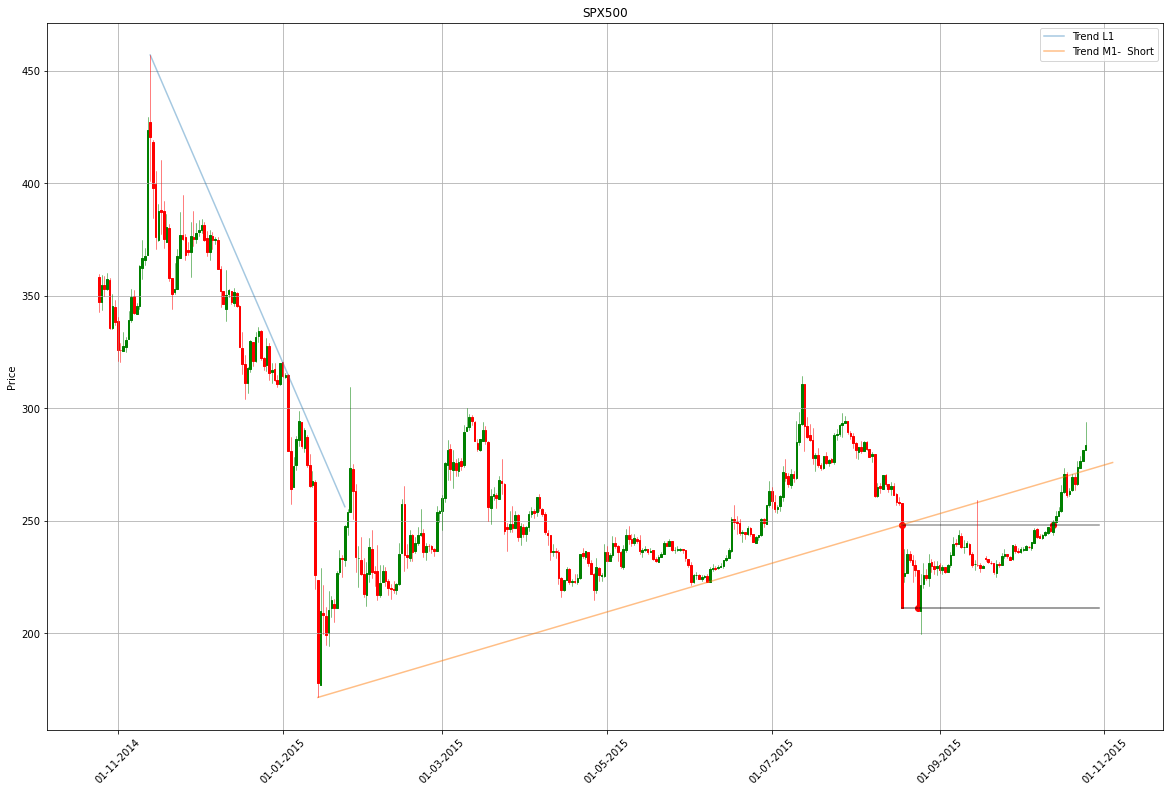

In [12]:
if QPointsAfterBrake < 1 or EndingPoint - 80 > ClosingPrice_BPPosition:
    
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    
    print('Wykres bez tuneli')
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()

elif QPointsAfterBrake == 1:
    
    dfxx.reset_index(inplace = True)
    dfM1.reset_index(inplace = True)
    dfM1a.reset_index(inplace = True)

    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    ax3.plot(XBP, YBP, color='black', alpha = 0.4)
    ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
    plt.show()
       
else:
    
    dfxx.reset_index(inplace = True)
    dfM1.reset_index(inplace = True)
    dfM1a.reset_index(inplace = True)

    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    ax4 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    ax3.plot(XBP, YBP, color='black', alpha = 0.4)
    ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)

    ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
    plt.show()

# Kolejne przerwanie M1

In [19]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2015-10-25'

In [20]:
End = pd.to_datetime(End)
dfxxx = df.loc[Start:End]
dfxxx.index = dfxxx.index.map(mdates.date2num)

In [23]:
dfM11

,Open,High,Low,Close,Volume,TrendLine,UpBreakOfTL,Distance(Low-TL)
16725.0,262.747009,273.578003,262.367004,270.640015,43199600.0,269.532158,1.107857,NaN
16726.0,270.907013,271.667999,260.777008,261.643005,22434300.0,269.887311,-8.244306,NaN
16727.0,261.860992,264.820007,260.950989,263.437012,25258800.0,270.242463,-6.805451,NaN
16728.0,263.571991,270.834991,263.226990,269.463013,30889800.0,270.597616,-1.134603,NaN
16729.0,269.306000,270.769989,263.838989,266.272003,25637300.0,270.952769,-4.680766,NaN
16730.0,266.496002,276.510010,266.135010,274.023010,37808600.0,271.307922,2.715088,NaN
16731.0,273.648987,278.683990,273.542999,276.496002,29442500.0,271.663074,4.832928,NaN
16732.0,276.503998,281.705994,276.503998,281.653992,25942400.0,272.018227,9.635765,NaN
16733.0,281.445007,294.058990,281.445007,283.679993,45717100.0,272.373380,11.306613,NaN


In [25]:
dfM11 = dfxxx[BP2[0]:]
dfM11['TrendLine'] = dfM11.index * a2 + b2
dfM11['UpBreakOfTL'] = dfM11['Close'] - dfM11['TrendLine']


if len(dfM11[dfM11['UpBreakOfTL']>0]) > 0:
#Zastanowić się nad warunkiem: Poprzedni tunel musi być decyzyjny - pozycja long/short

    BPUpPosition = dfM11.index[dfM11['UpBreakOfTL']>0][0]
    BPUpPrice = dfM11['Close'][dfM11['UpBreakOfTL'] > 0].iloc[0]

    print('----------------------------------------------')
    print('Nastąpiło przerwanie trendu dfM11 w górę')
    print(f'Pozycja przerwania: {BPUpPosition}')
    print(f'Cena przecięcia: {BPUpPrice}')
    print('---------------------------------------------')

    dfM11 = dfM11[BPUpPosition:]
    dfM11['Distance(Low-TL)'] = dfM11['Close'] - dfM11['TrendLine']
    
    QPointsAfterNextBP = dfM11['Distance(Low-TL)'][dfM11['Distance(Low-TL)']<0].count()


    if QPointsAfterNextBP > 0:
    
        ClosingPrice_NextBP =  dfM11['Close'][dfM11['Distance(Low-TL)']<0].iloc[0]
        ClosingPrice_NextBPPosition = dfM11.index[dfM11['Distance(Low-TL)']<0][0]
        PointBeforeNextBPPosition = ClosingPrice_NextBPPosition - 1
        PointBeforeNextBPPrice = dfM11['Close'].loc[PointBeforeNextBPPosition]
        TrendPriceBeforeNextBP  =  PointBeforeNextBPPosition * a2 + b2

        EndingPoint = dfM11.index[-1]

        if EndingPoint - 80 > ClosingPrice_NextBPPosition:
            print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
            print('-----------------------------------------------------------------------------------------')
            print('Nie rysujemy tuneli')

        else:
            print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
            print('---------------------------------------------------------------------------------')

            #Sprawdzamy, czy wielkość tunelu jest większa niż 25% wielkości świeczki
            #Jeśli tunel jest mniejszy: cena otwarcia staje się górną granicą tunelu

            NextBPPrice = ClosingPrice_NextBPPosition *a2 + b2
            OpenPrice_NextBP = dfM11.loc[ClosingPrice_NextBPPosition]['Open']
            NextBPCandleHeight = OpenPrice_NextBP - ClosingPrice_NextBP
            TunelHeight = NextBPPrice - ClosingPrice_NextBP


            if TunelHeight/NextBPCandleHeight < 1/4:

                print('Draw a tunel starting from Open to Close')

                if TrendPriceBeforeNextBP < PointBeforeNextBPPrice:

                    ClosingPrice_NextBPPositionEnd = dfM11.index[-1]+5
                    NextBPPrice = OpenPrice_NextBP


                    XNextBP = [ClosingPrice_NextBPPosition, ClosingPrice_NextBPPositionEnd]
                    YNextBP = [NextBPPrice, NextBPPrice]
                    XClosingPrice = [ClosingPrice_NextBPPosition, ClosingPrice_NextBPPositionEnd]
                    YClosingPrice = [ClosingPrice_NextBP, ClosingPrice_NextBP]


                    print('Przebicie trendu wzrostowego L1 w dół')
                    print(f'Punkt oporu: {YNextBP[0]}')
                    print(f'Punkt wsparcia: {YClosingPrice[0]}')
                    print('---------------------------------------')

                    # liczymy przełamania cen w korytarzu

                    dfM1b = dfxxx[ClosingPrice_NextBPPosition:]
                    dfM1b['DownLine'] = ClosingPrice_NextBP
                    dfM1b['UpLine'] = NextBPPrice
                    dfM1b['Down-Close'] = dfM1b['Close'] - dfM1b['DownLine']
                    dfM1b['UP-Close'] = dfM1b['UpLine'] - dfM1b['Close']

                    DownBreaks = len(dfM1b['Close'][dfM1b['Down-Close'] < 0])
                    UpBreaks = len(dfM1b['Close'][dfM1b['UP-Close'] < 0])

            #-----------------------------------------------------------------------------------------------------------------

                    if DownBreaks > 0 and UpBreaks == 0:


                        NextBPPrice = OpenPrice_NextBP
                        NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                        NextBP2Price = dfM1b['Close'][dfM1b['Down-Close'] < 0].iloc[0]
                        NextBP2Possition = dfM1b.index[dfM1b['Down-Close']<0][0]
                        NextBP2 = [NextBP2Possition, NextBP2Price]
                        NextBP3 = NextBP2
                        print('Second NextBP founded')
                        print(f'NextBP2Price: {NextBP2Price}, NextBP2Position: {NextBP2Possition}')

                        # przebicie przekraczające 50% wielkości tunelu:

                        HeightOfTunel = NextBPPrice - ClosingPrice_NextBP
                        HeightOfBreak = ClosingPrice_NextBP - NextBP2Price

                        if HeightOfBreak >= 0.5 * HeightOfTunel:

                            print('NextBP2 break Tunel by more than 50% height of tunel')
                            print('Short position recomended')



                        else:
                            print('')

            #-----------------------------------------------------------------------------------------------------------------               

                    elif UpBreaks >0 and DownBreaks ==0:

                        NextBPPrice = OpenPrice_NextBP
                        NextBP3Price = dfM1b['Close'][dfM1b['UP-Close'] < 0].iloc[0]
                        NextBP3Position = dfM1b.index[dfM1b['UP-Close'] < 0][0]

                        NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                        NextBP3 = [NextBP3Position, NextBP3Price]
                        NextBP2 = NextBP3
                        print('Third NextBP founded')

                        print(f'NextBP2Price: {NextBP3Price}, NextBP2Position: {NextBP3Position}')

                        # if  przebicie przekraczające 50% wielkości tunelu:

                        HeightOfTunel = NextBPPrice - ClosingPrice_NextBP
                        HeightOfBreak = NextBP3Price - NextBPPrice

                        if HeightOfBreak >= 0.5 * HeightOfTunel:

                            print('NextBP2 break Tunel by more than 50% height of tunel')
                            print('Long position recomended')

                        else:
                            print('')

            #----------------------------------------------------------------------------------------------------------                

                    elif DownBreaks > 0 and UpBreaks > 0:

                        NextBPPrice = OpenPrice_NextBP
                        NextBP2Price = dfM1b['Close'][dfM1b['Down-Close'] < 0].iloc[0]
                        NextBP2Possition = dfM1b.index[dfM1b['Down-Close']<0][0]

                        NextBP3Price = dfM1b['Close'][dfM1b['UP-Close'] < 0].iloc[0]
                        NextBP3Position = dfM1b.index[dfM1b['UP-Close'] < 0][0]

                        if NextBP2Possition < NextBP3Position:

                            NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                            NextBP2 = [NextBP2Possition, ClosingPrice_NextBP]
                            NextBP3 = [NextBP3Position, NextBPPrice]

                            print('Long Position recomended')
                            print(f'First Break Point: {NextBP1}')
                            print(f'Second Break Point: {NextBP2}')
                            print(f'Third and decisive Break Point: {NextBP3}')

                        #----------------------------------------------------------------------------------------------------        

                        elif NextBP2Possition > NextBP3Position:

                            NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                            NextBP2 = [NextBP2Possition, ClosingPrice_NextBP]
                            NextBP3 = [NextBP3Position, NextBPPrice]

                            print('Short Position recomended')
                            print(f'First Break Point: {NextBP1}')
                            print(f'Second Break Point: {NextBP3}')
                            print(f'Third and decisive Break Point: {NextBP2}')

                #------------------------------------------------------------------------------------------
                    else:
                        NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                        NextBP2 = NextBP1
                        NextBP3 = NextBP1
                        print('There is no decisive NextBP yet')

        #-----------------------------------------------------------------------------------------------------------------

            else:
                print('Draw a tunel starting from NextBP to Close')
                print('-----------------------------------------------------------------------------')

                if TrendPriceBeforeNextBP < PointBeforeNextBPPrice:

                    ClosingPrice_NextBPPositionEnd = dfM11.index[-1]+5
                    NextBPPrice = ClosingPrice_NextBPPosition *a2 + b2


                    XNextBP = [ClosingPrice_NextBPPosition, ClosingPrice_NextBPPositionEnd]
                    YNextBP = [NextBPPrice, NextBPPrice]
                    XClosingPrice = [ClosingPrice_NextBPPosition, ClosingPrice_NextBPPositionEnd]
                    YClosingPrice = [ClosingPrice_NextBP, ClosingPrice_NextBP]
                    NextBPPrice = ClosingPrice_NextBPPosition *a2 + b2

                    print('Przebicie trendu wzrostowego L1 w dół')
                    print(f'Punkt przecięcia: {YNextBP[0]}')
                    print(f'Punkt wsparcia: {YClosingPrice[0]}')
                    print('---------------------------------------')

                    # liczymy przełamania cen w korytarzu

                    dfM1b = dfxxx[ClosingPrice_NextBPPosition:]
                    dfM1b['DownLine'] = ClosingPrice_NextBP
                    dfM1b['UpLine'] = NextBPPrice
                    dfM1b['Down-Close'] = dfM1b['Close'] - dfM1b['DownLine']
                    dfM1b['UP-Close'] = dfM1b['UpLine'] - dfM1b['Close']

                    DownBreaks = len(dfM1b['Close'][dfM1b['Down-Close'] < 0])
                    UpBreaks = len(dfM1b['Close'][dfM1b['UP-Close'] < 0])

            #-----------------------------------------------------------------------------------------------------------------

                    if DownBreaks > 0 and UpBreaks == 0:

                        NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                        NextBP2Price = dfM1b['Close'][dfM1b['Down-Close'] < 0].iloc[0]
                        NextBP2Possition = dfM1b.index[dfM1b['Down-Close']<0][0]
                        NextBP2 = [NextBP2Possition, NextBP2Price]
                        NextBP3 = NextBP2
                        print('Second NextBP founded')
                        print(f'NextBP2Price: {NextBP2Price}, NextBP2Position: {NextBP2Possition}')
                        print('Wait for third NextBP')

                        # przebicie przekraczające 50% wielkości tunelu:

                        HeightOfTunel = NextBPPrice - ClosingPrice_NextBP
                        HeightOfBreak = ClosingPrice_NextBP - NextBP2Price

                        if HeightOfBreak >= 0.5 * HeightOfTunel:

                            print('NextBP2 break Tunel by more than 50% height of tunel')
                            print('Short position recomended')

                        else:
                            print('')

            #-----------------------------------------------------------------------------------------------------------------               

                    elif UpBreaks >0 and DownBreaks ==0:

                        NextBP3Price = dfM1b['Close'][dfM1b['UP-Close'] < 0].iloc[0]
                        NextBP3Position = dfM1b.index[dfM1b['UP-Close'] < 0][0]

                        NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                        NextBP3 = [NextBP3Position, NextBP3Price]
                        NextBP2 = NextBP3
                        print('Third NextBP founded')

                        print(f'NextBP2Price: {NextBP3Price}, NextBP2Position: {NextBP3Position}')

                        # if  przebicie przekraczające 50% wielkości tunelu:

                        HeightOfTunel = NextBPPrice - ClosingPrice_NextBP
                        HeightOfBreak = NextBP3Price - NextBPPrice

                        if HeightOfBreak >= 0.5 * HeightOfTunel:

                            print('NextBP2 break Tunel by more than 50% height of tunel')
                            print('Long position recomended')

                        else:
                            print('')

            #----------------------------------------------------------------------------------------------------------                

                    elif DownBreaks > 0 and UpBreaks > 0:

                        NextBP2Price = dfM1b['Close'][dfM1b['Down-Close'] < 0].iloc[0]
                        NextBP2Possition = dfM1b.index[dfM1b['Down-Close']<0][0]

                        NextBP3Price = dfM1b['Close'][dfM1b['UP-Close'] < 0].iloc[0]
                        NextBP3Position = dfM1b.index[dfM1b['UP-Close'] < 0][0]

                        if NextBP2Possition < NextBP3Position:

                            NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                            NextBP2 = [NextBP2Possition, ClosingPrice_NextBP]
                            NextBP3 = [NextBP3Position, NextBPPrice]

                            print('Long Position recomended')
                            print(f'First Break Point: {NextBP1}')
                            print(f'Second Break Point: {NextBP2}')
                            print(f'Third and decisive Break Point: {NextBP3}')

                        #----------------------------------------------------------------------------------------------------        

                        elif NextBP2Possition > NextBP3Position:

                            NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                            NextBP2 = [NextBP2Possition, ClosingPrice_NextBP]
                            NextBP3 = [NextBP3Position, NextBPPrice]

                            print('Short Position recomended')
                            print(f'First Break Point: {NextBP1}')
                            print(f'Second Break Point: {NextBP3}')
                            print(f'Third and decisive Break Point: {NextBP2}')

        #----------------------------------------------------------------------------------------------------------

                    else:
                        NextBP1 = [ClosingPrice_NextBPPosition, NextBPPrice]
                        NextBP2 = NextBP1
                        NextBP3 = NextBP1
                        print('There is no decisive NextBP yet')

    else:
        print('Brak przecięcia Lini trendu')

----------------------------------------------
Nastąpiło przerwanie trendu dfM11 w górę
Pozycja przerwania: 16725.0
Cena przecięcia: 270.640015
---------------------------------------------
Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu
---------------------------------------------------------------------------------
Draw a tunel starting from NextBP to Close
-----------------------------------------------------------------------------
Przebicie trendu wzrostowego L1 w dół
Punkt przecięcia: 269.8873105972225
Punkt wsparcia: 261.643005
---------------------------------------
Third NextBP founded
NextBP2Price: 274.02301, NextBP2Position: 16730.0
NextBP2 break Tunel by more than 50% height of tunel
Long position recomended


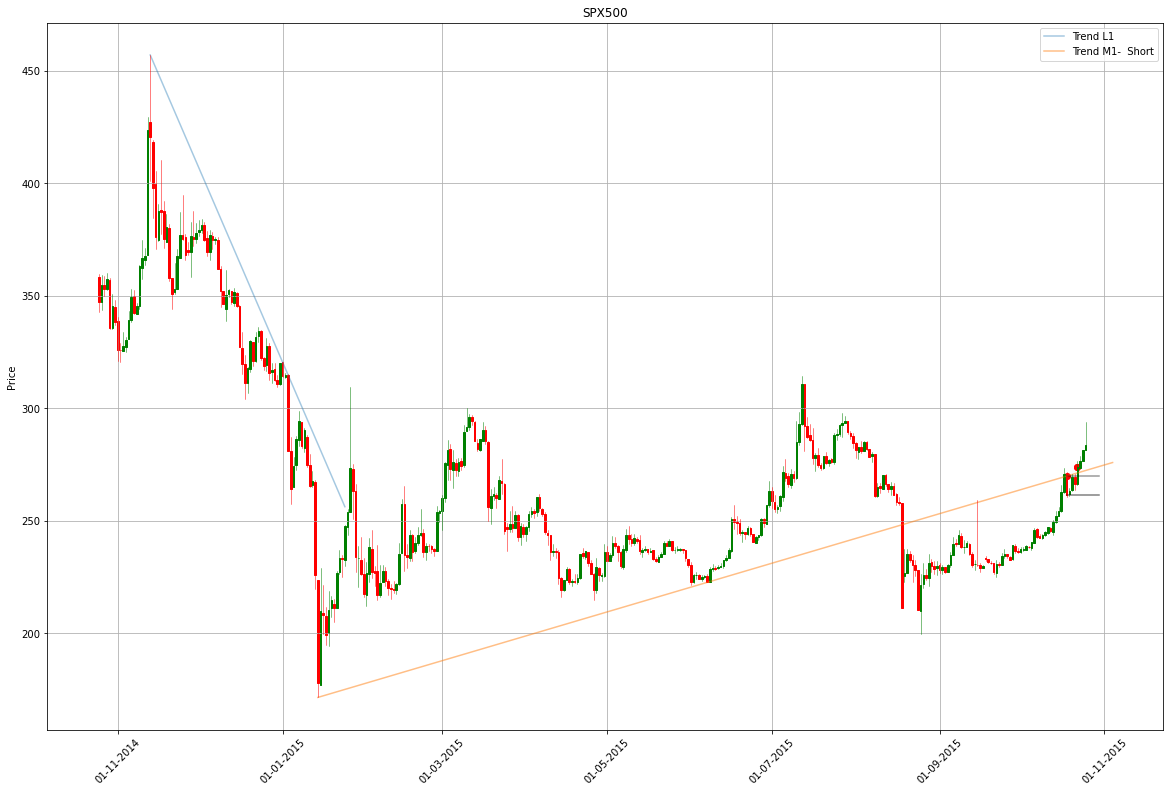

In [27]:
if QPointsAfterBrake < 1 or EndingPoint - 80 > ClosingPrice_BPPosition:
    
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    
    print('Wykres bez tuneli')
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()

elif QPointsAfterBrake == 1:
    
    dfxxx.reset_index(inplace = True)
    dfM11.reset_index(inplace = True)
    dfM1b.reset_index(inplace = True)

    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    ax3.plot(XNextBP, YNextBP, color='black', alpha = 0.4)
    ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
    plt.show()
       
else:
    
    dfxxx.reset_index(inplace = True)
    dfM11.reset_index(inplace = True)
    dfM1b.reset_index(inplace = True)

    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    ax4 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    ax3.plot(XNextBP, YNextBP, color='black', alpha = 0.4)
    ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)

    ax4.scatter(NextBP1[0], NextBP1[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(NextBP2[0], NextBP2[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(NextBP3[0], NextBP3[1], alpha=1, color = 'red', edgecolors = 'face' )


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
    plt.show()

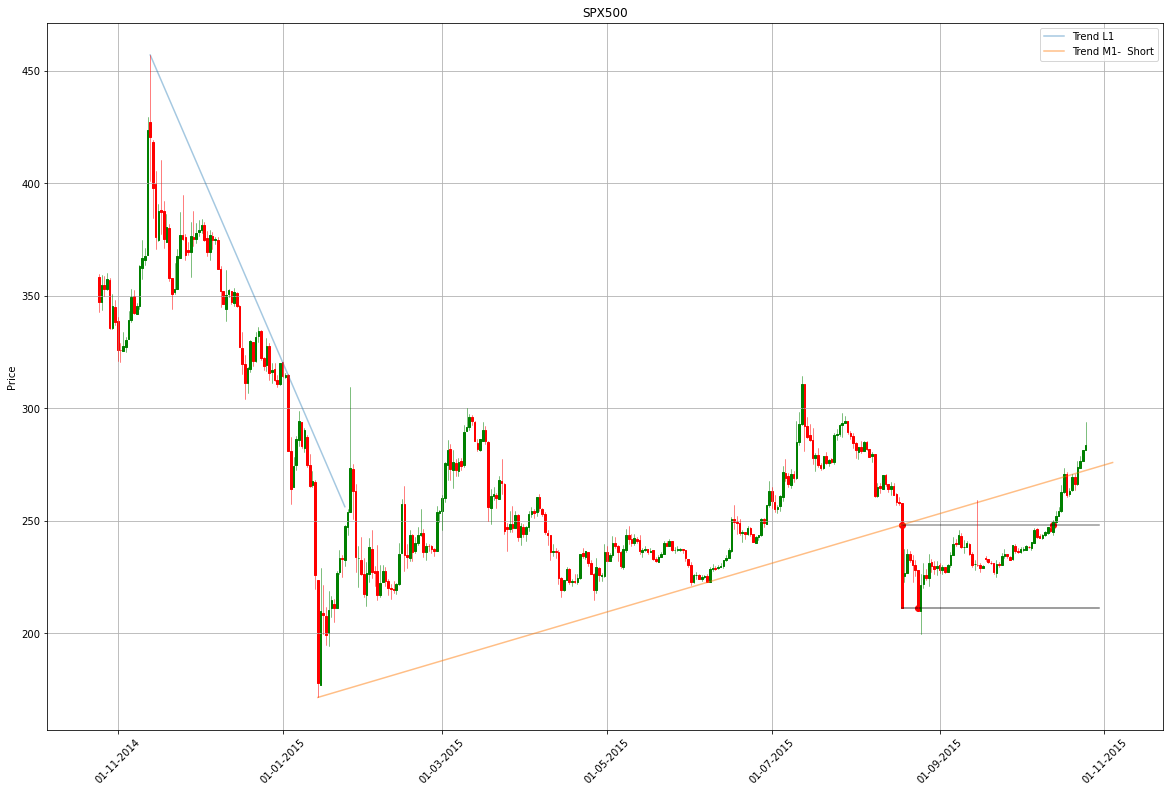

wykres z tunelami i BP(1-3)


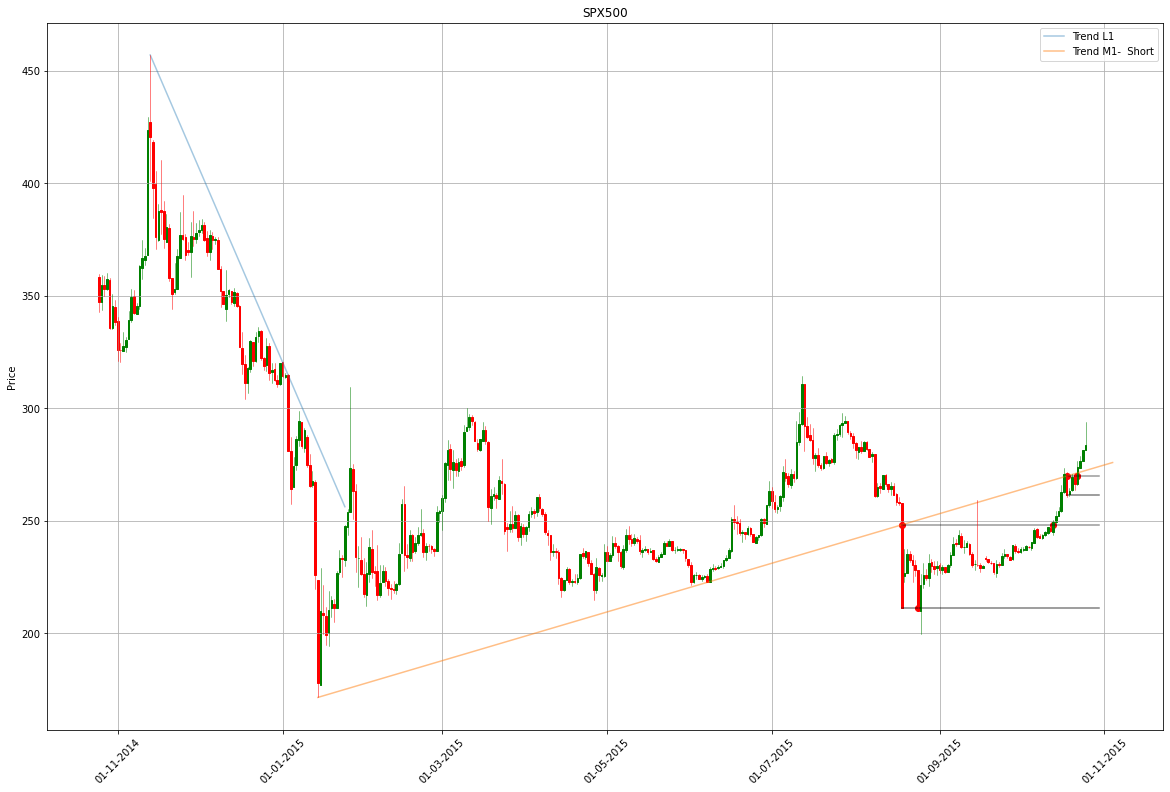

Wykres z BP i second BP


In [126]:
if QPointsAfterBrake <= 0:
    
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    
    print('Wykres bez tuneli')
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    
else:
    
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    df3.reset_index(inplace = True)
    df4.reset_index(inplace = True)
    
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    ax4 = fig.add_subplot(111)
    

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    ax3.plot(XBP, YBP, color='black', alpha = 0.4)
    ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)

    ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()

   
    print('wykres z tunelami i BP(1-3)')
    
    if len(df5['UpBreakOfTL'] < 0) > 0:
        
        
        df5.reset_index(inplace = True)
        df6.reset_index(inplace = True)
        
        fig = plt.figure(figsize=(20,13))
        ax1 = fig.add_subplot(111)
        ax2 = fig.add_subplot(111)
        ax3 = fig.add_subplot(111)
        ax4 = fig.add_subplot(111)
        ax5 = fig.add_subplot(111)
        ax6 = fig.add_subplot(111)

        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
        ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

        ax3.plot(XBP, YBP, color='black', alpha = 0.4)
        ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)

        ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )

        ax5.plot(SecondXBP, SecondYBP, color='black', alpha = 0.4)
        ax5.plot(SecondXClosingPrice, SecondYClosingPrice, color='black', alpha = 0.5)

        ax6.scatter(SecondBP1[0], SecondBP1[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax6.scatter(SecondBP2[0], SecondBP2[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax6.scatter(SecondBP3[0], SecondBP3[1], alpha=1, color = 'red', edgecolors = 'face' )


        plt.ylabel("Price")
        plt.title('SPX500')
        ax1.grid(True)
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
        plt.show()
        
        print('Wykres z BP i second BP')
    
    else:
        print('---')